In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set()

## **Data**

In [2]:
start = 1880
end = 2020

years = range(start, end + 1)
columns = ['name', 'gender', 'births']

data_frames = []
for year in years:
    path = 'names/yob' + str(year) + '.txt'
    df = pd.read_csv(path, names=columns)
    df['year'] = year
    data_frames.append(df)
    
names = pd.concat(data_frames, ignore_index=True) 
names.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


## **Number of births over the years**

In [3]:
total = names.pivot_table('births', columns='gender', index='year', aggfunc=np.sum)
total.head()

gender,F,M
year,,
1880,90994,110490
1881,91953,100738
1882,107847,113686
1883,112319,104625
1884,129019,114442


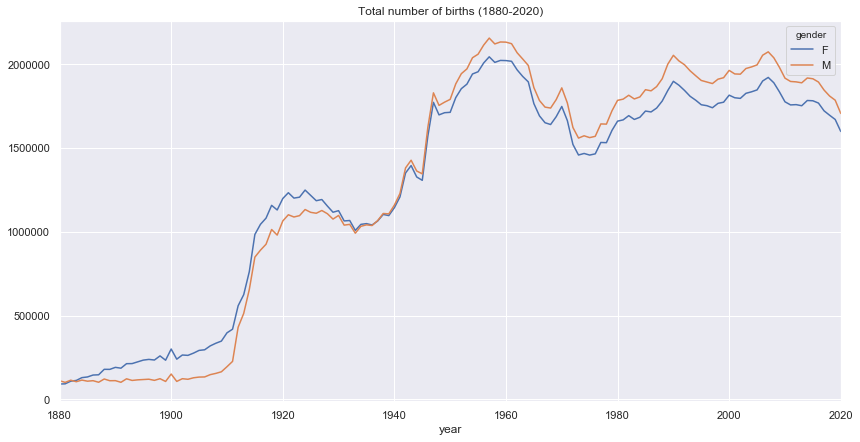

In [4]:
total.plot(figsize=(14,7), title='Total number of births (%d-%d)' %(start, end))

## **Most popular names over the years**

In [5]:
def top(group, n=10, asc=False):
    return group.sort_values(by='births', ascending=asc)[:n]

top1_names = names.groupby(by=['year', 'gender']).apply(top, n=1)
top1_names.reset_index(inplace=True, drop=True)

### **Top 1 over the years (male)**

In [6]:
top1_names[top1_names['gender']=='M'][['name', 'year']].set_index('year').T

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
name,John,John,John,John,John,John,John,John,John,John,...,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam,Liam,Liam


### **Top 1 over the years (female)**

In [7]:
top1_names[top1_names['gender']=='F'][['name', 'year']].set_index('year').T

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
name,Mary,Mary,Mary,Mary,Mary,Mary,Mary,Mary,Mary,Mary,...,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma,Olivia,Olivia


### **How many times was the most popular? (male)**

In [8]:
top1_male_frequency = top1_names[top1_names['gender']=='M']['name'].value_counts()
top1_male_frequency

John       44
Michael    44
Robert     17
Jacob      14
James      13
Liam        4
Noah        4
David       1
Name: name, dtype: int64

### **How many times was the most popular? (female)**

In [9]:
top1_female_frequency = top1_names[top1_names['gender']=='F']['name'].value_counts()
top1_female_frequency

Mary        76
Jennifer    15
Emily       12
Jessica      9
Lisa         8
Emma         6
Linda        6
Sophia       3
Ashley       2
Olivia       2
Isabella     2
Name: name, dtype: int64

### The most popular names in the selected year

In [10]:
def top_n_names_of_the_year(year, n, data=names):
    top_names = data.groupby(by=['year', 'gender']).apply(top, n=n)
    top_names.reset_index(inplace=True, drop=True)
    print('Top %d names (%d)' %(n, year))
    return top_names[top_names['year'] == year]

In [11]:
top_n_names_of_the_year(2020, 3)

Top 3 names (2020)


,name,gender,births,year
840,Olivia,F,17535,2020
841,Emma,F,15581,2020
842,Ava,F,13084,2020
843,Liam,M,19659,2020
844,Noah,M,18252,2020
845,Oliver,M,14147,2020


In [12]:
top_n_names_of_the_year(1990, 3)

Top 3 names (1990)


,name,gender,births,year
660,Jessica,F,46483,1990
661,Ashley,F,45560,1990
662,Brittany,F,36537,1990
663,Michael,M,65302,1990
664,Christopher,M,52347,1990
665,Matthew,M,44819,1990


### **Frequency of the most popular names in the past and present over the years**

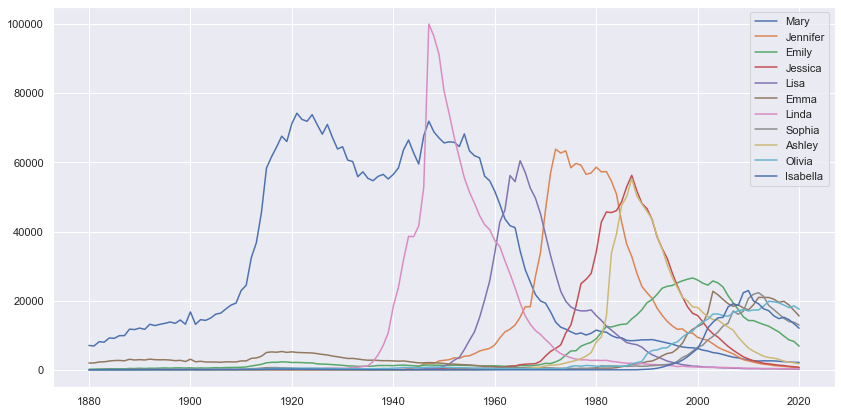

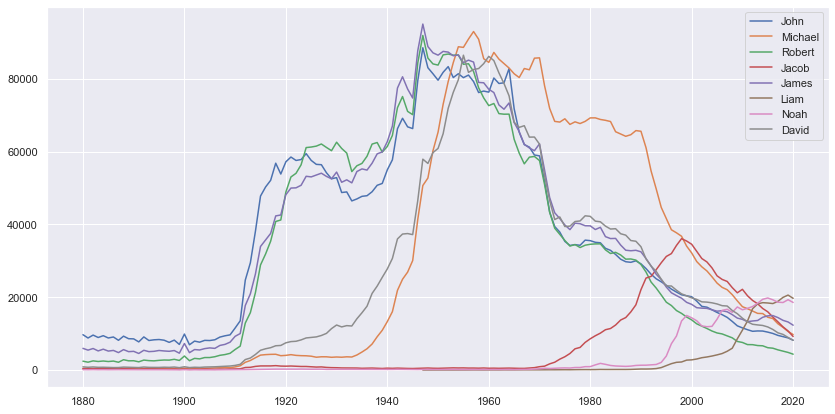

In [13]:
def names_frequency_time_series(names_list, data=names):
    plt.figure(figsize=(14,7))
    for name in names_list:
        plt.plot(data[data['name'] == name].pivot_table('births', index='year', aggfunc=sum), label=name)
    plt.legend()

names_frequency_time_series(top1_female_frequency.index)
names_frequency_time_series(top1_male_frequency.index)

## **Variety of names**

### **Number of different names over the year**

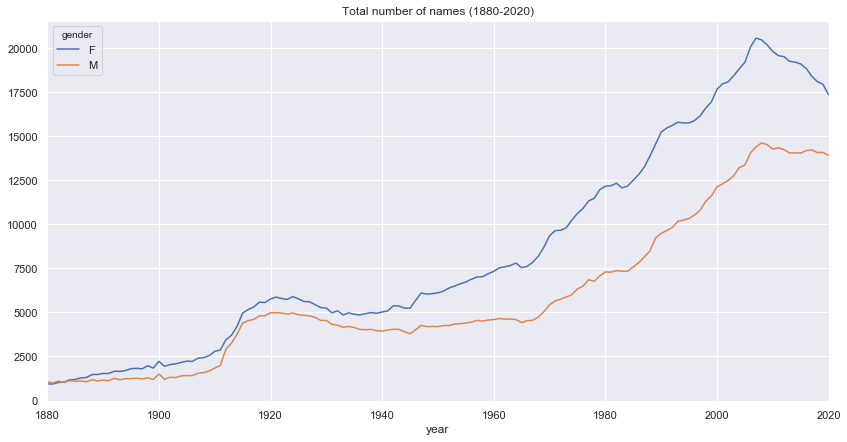

In [14]:
def how_many(group):
    return group['name'].unique().shape[0]

number_of_names = names.groupby(by=['year', 'gender']).apply(how_many).unstack()
number_of_names.plot(figsize=(14,7), title='Total number of names (%d-%d)' %(start, end))

### **Ratio of the top 100 names over the year**

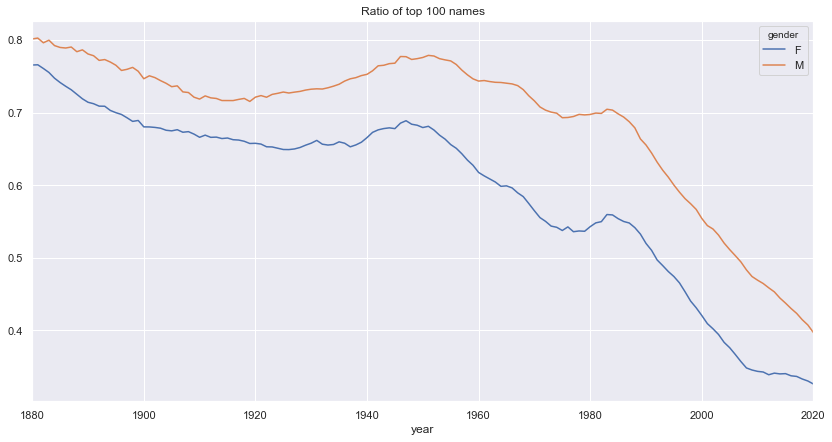

In [15]:
top100_names = names.groupby(by=['year', 'gender']).apply(top, n=100)
top100_names.reset_index(inplace=True, drop=True)
total_top100 = top100_names.pivot_table('births', columns='gender', index='year', aggfunc=sum)
ratio_top100 = total_top100 / total
ratio_top100.plot(figsize=(14,7), title='Ratio of top 100 names')

## **Name trend vs gender**

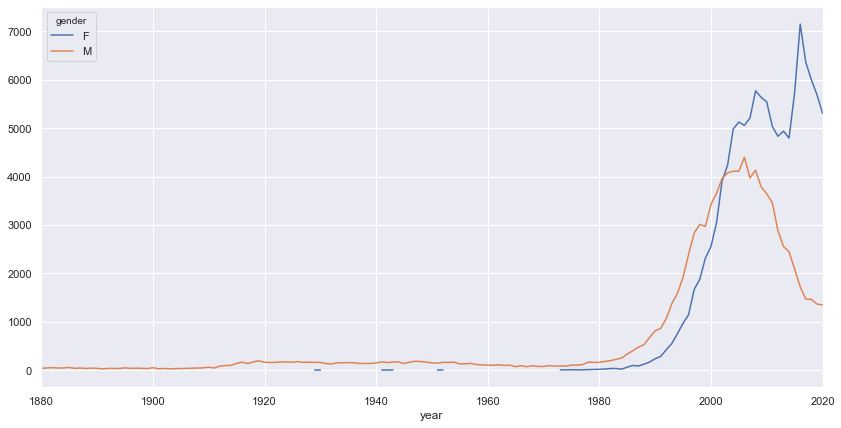

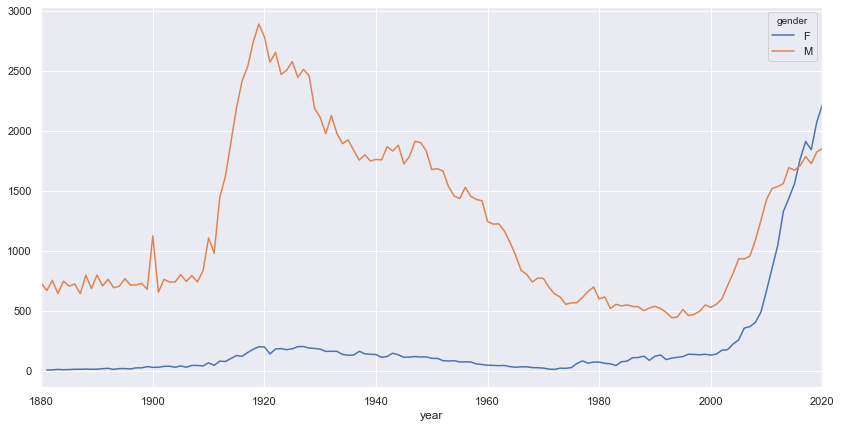

In [16]:
def name_trend(name, data=names):
    df_temp = data[data['name'] == name]
    df_temp = df_temp.pivot_table('births', columns='gender', index='year', aggfunc=sum)
    df_temp.plot(figsize=(14,7))
    
name_trend('Riley')
name_trend('Charlie')

## **First letter**

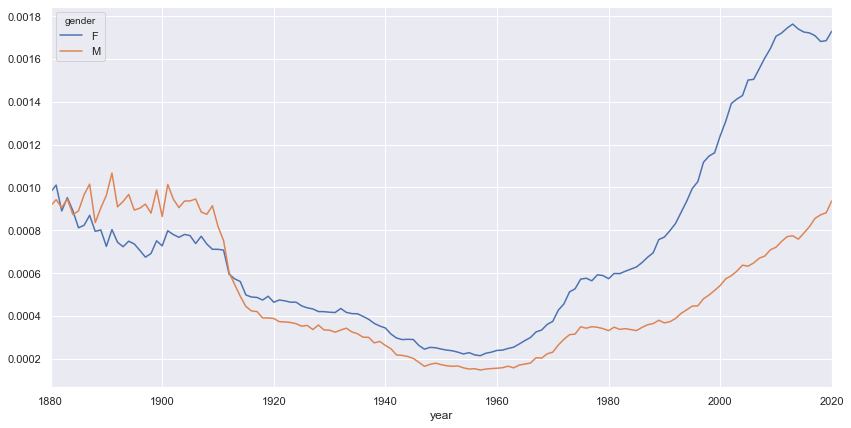

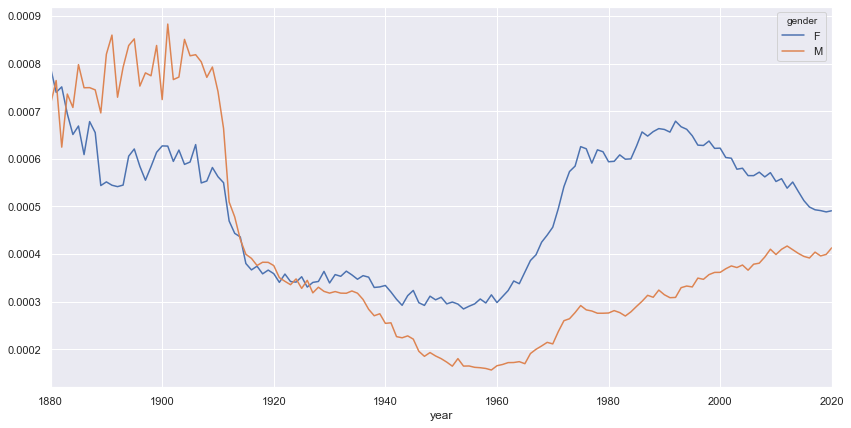

In [17]:
def first_letter_is(name, letter):
    return int(name[0] == letter)

def first_letter_frequency(letter, data=names, total=total):
    first = data['name'].apply(first_letter_is, letter=letter)
    df_temp = data.copy(deep=False)
    df_temp['first'] = first
    df_temp = df_temp.pivot_table('first', columns='gender', index='year', aggfunc=sum) / total
    df_temp.plot(figsize=(14,7))
    
first_letter_frequency('A')
first_letter_frequency('C')

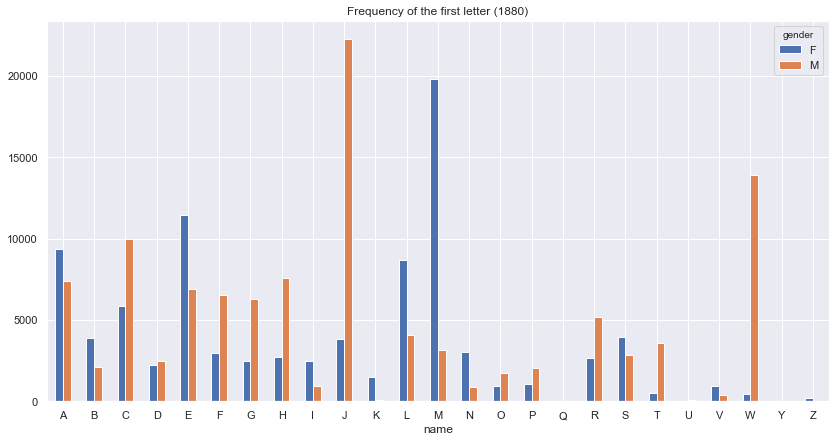

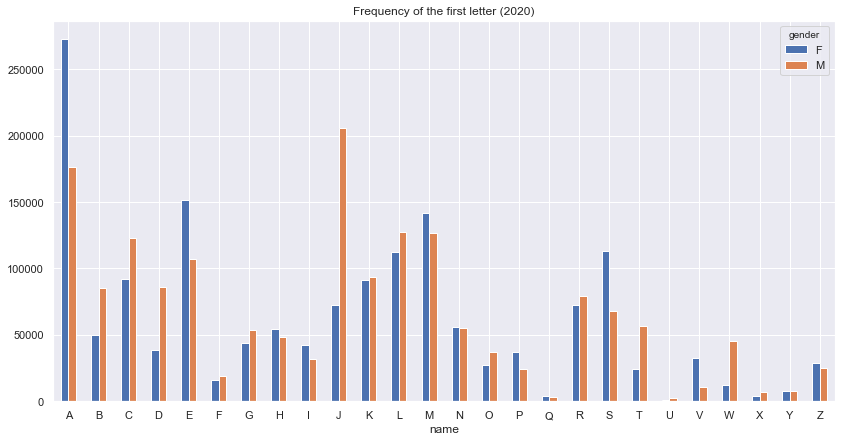

In [18]:
def first_letter(name):
    return name[0]

def first_letter_year(year, data=names):
    first = data['name'].apply(first_letter)
    df_temp = data.copy(deep=False)
    df_temp['first'] = first
    df_temp = df_temp[df_temp['year'] == year].pivot_table('births', columns='gender', index=first, aggfunc=sum)
    df_temp.plot(kind='bar', rot=0, figsize=(14,7), title='Frequency of the first letter (%d)' %year)
    
first_letter_year(1880)
first_letter_year(2020)

## New feature- to do

In [19]:
columns = ['state', 'gender', 'year', 'name', 'births']
path = 'namesbystate/'

data_frames = []
for _, __, filenames in os.walk(path):
    for filename in filenames:
        if filename.find('TXT') != -1:
            path_file = path + filename
            df = pd.read_csv(path_file, names=columns)
            data_frames.append(df)
    
namesbystate = pd.concat(data_frames, ignore_index=True) 
namesbystate.head()

,state,gender,year,name,births
0,IN,F,1910,Mary,619
1,IN,F,1910,Helen,324
2,IN,F,1910,Ruth,238
3,IN,F,1910,Dorothy,215
4,IN,F,1910,Mildred,200
